
# Diseño de software para cómputo científico

## Lenguajes de alto nivel

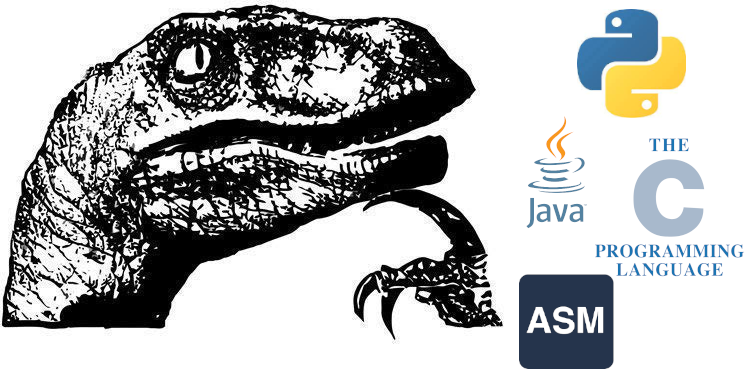

### Diferencias entre alto y bajo nivel

---

<small>
Basado en: <a href="https://www.1000tipsinformaticos.com/2017/11/lenguajes-de-programacion-de-alto-nivel-vs-bajo-nivel.html">https://www.1000tipsinformaticos.com/2017/11/lenguajes-de-programacion-de-alto-nivel-vs-bajo-nivel.html</a>
</small>

- No hay criterios de calificación específicos para la diferencia entre **Alto** y **Bajo** nivel. Es mas útil hablar sobre niveles “más altos” y “más bajos”.
- Se depende en gran medida de la perspectiva del desarrollador. Si eres un programador de C, Java puede parecer bastante alto. Si estás acostumbrado a Python, Java puede parecer un lenguaje de bajo nivel.

### Diferencias entre alto y bajo nivel

---

### Lenguaje de máquina y lenguajes de bajo nivel

- Si un lenguaje se considera de alto nivel o de bajo nivel (o en algún punto intermedio) tiene que ver con la abstracción. 
- El lenguaje de máquina no tiene abstracción, contiene las instrucciones individuales pasadas a una computadora. Y dado que las máquinas solo tratan en números, están representadas en binario (aunque a veces están escritas en notación decimal o hexadecimal).
- Escribir directamente en lenguaje de máquina es muy difícil.

### Diferencias entre alto y bajo nivel

---

#### Lenguaje de máquina y lenguajes de bajo nivel

- Los lenguajes de programación de bajo nivel agregan un poco de abstracción al **lenguaje de máquina**. 
- Se oculta instrucciones detrás de declaraciones más legibles para el ser humano. 
- Los lenguajes de **assembler** son los de nivel más bajo junto al **lenguaje de máquina**. 

```
10110000 01100001
``` 
VS

```nasm
MOV AL, 61h
```

- En el lenguaje `C` . La mayoría de las operaciones escritas **TODAVÍA** se pueden completar con un pequeño número de instrucciones de lenguaje de máquina.

### Diferencias entre alto y bajo nivel

---

Esto es un hola mundo en Assembly para de Intel x86

<small>
    <b>Fuente:</b> <a href="https://jameshfisher.com/2018/03/10/linux-assembly-hello-world/">
        https://jameshfisher.com/2018/03/10/linux-assembly-hello-world/
    </a>
</small>


```nasm
global _start

section .text

_start:
  mov rax, 1        ; write(
  mov rdi, 1        ;   STDOUT_FILENO,
  mov rsi, msg      ;   "Hello, world!\n",
  mov rdx, msglen   ;   sizeof("Hello, world!\n")
  syscall           ; );

  mov rax, 60       ; exit(
  mov rdi, 0        ;   EXIT_SUCCESS
  syscall           ; );

section .rodata
  msg: db "Hello, world!", 10
  msglen: equ $ - msg
```

### Diferencias entre alto y bajo nivel

---

Si "ensamblamos" esto con el comando

In [2]:
!nasm -f elf64 -o codes/hello.o codes/hello.s
!ld -o codes/hello codes/hello.o

Obtenemos esto

In [3]:
!xxd codes/hello

00000000: 7f45 4c46 0201 0100 0000 0000 0000 0000  .ELF............
00000010: 0200 3e00 0100 0000 0010 4000 0000 0000  ..>.......@.....
00000020: 4000 0000 0000 0000 3021 0000 0000 0000  @.......0!......
00000030: 0000 0000 4000 3800 0300 4000 0600 0500  ....@.8...@.....
00000040: 0100 0000 0400 0000 0000 0000 0000 0000  ................
00000050: 0000 4000 0000 0000 0000 4000 0000 0000  ..@.......@.....
00000060: e800 0000 0000 0000 e800 0000 0000 0000  ................
00000070: 0010 0000 0000 0000 0100 0000 0500 0000  ................
00000080: 0010 0000 0000 0000 0010 4000 0000 0000  ..........@.....
00000090: 0010 4000 0000 0000 2700 0000 0000 0000  ..@.....'.......
000000a0: 2700 0000 0000 0000 0010 0000 0000 0000  '...............
000000b0: 0100 0000 0400 0000 0020 0000 0000 0000  ......... ......
000000c0: 0020 4000 0000 0000 0020 4000 0000 0000  . @...... @.....
000000d0: 0e00 0000 0000 0000 0e00 0000 0000 0000  ................
000000e0: 0010 0000 0000 0000 0000 0000 0000 000

### Diferencias entre alto y bajo nivel

---

#### Lenguajes de programación de alto nivel

- Al igual que los lenguajes de bajo nivel, los de alto nivel cubren un amplio espectro de abstracción. 
- `Java`, por ejemplo, aún te dan mucho control sobre cómo la computadora administra la memoria y los datos.
- `Ruby`, `Javascript`, `Python`, `R` o `Julia` son muy abstractos. Dan menos acceso a esas funciones de bajo nivel, pero la sintaxis es mucho más fácil de leer y permite enforcarse mejor en la algoritmia.


### Diferencias entre alto y bajo nivel
---
#### ¿Deberías aprender un lenguaje de bajo o alto nivel?

- Preguntas y "afirmaciones" de novatos:
    - ¿Deberías aprender un lenguaje de bajo o alto nivel?. 
    - ¿Son mejores los lenguajes de programación de alto o bajo nivel?
-  Repuesta adecuada:    

> Toda respuesta profesional válida empieza con la palabra "DEPENDE".
>
> Depende lo que quieras hacer.

## Diferencias entre alto y bajo nivel
---
#### Considera aprender tanto alto como bajo nivel

- Los lenguajes de bajo nivel suelen ganar en velocidad y libertad (El caso de `RUST` es particular).
- Los de alto nivel suelen ganar en proficiencia, facilidad y seguridad.
- También es mas común clasificar lenguajes en "de sistemas" (`RUST`, `C/C++`, `D`, `Objective-C`), "generales" (`Python`, `Ruby`, `Java`) y de propósito específico (`SQL`, `matlab/octave`, `FORTRAN`, `R`). Pero también esta clasificación es contradictoria.

### Disclaimer

----

- Ya mencionamos la "verdad de la milanesa".
- De ahora en mas, vamos a ceñirnos al alto nivel como "lo correcto" (no sean fanáticos).
- Lo útil, para cómputo científico, es saber un lenguaje de alto nivel y uno de bajo nivel. 
- Las referencias que demos a "bajo nivel" van a ser desde el punto de vista de "alto nivel".

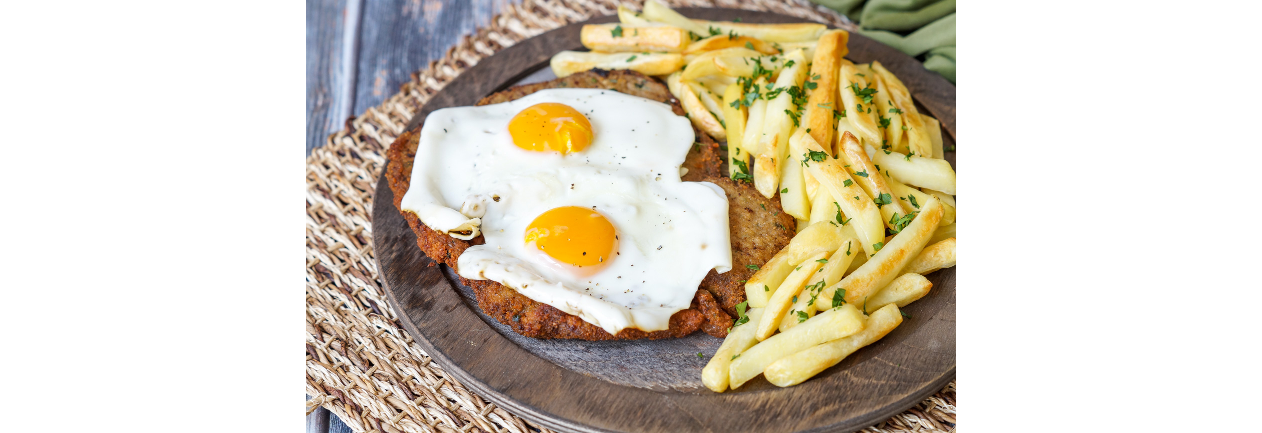

### Lenguajes dinámicos y estáticos

----

#### La historia en código

In [5]:
def matar(bicho, arma):
    """Recibe un bicho y un arma, ambos enteros que representan
    la cantidad de vida del primero, y cuanto daño hace la segunda
    y retorna True si la cantidad de vida se disminuye 0"""
    return (bicho - arma) <= 0

In [6]:
matar(bicho=100, arma=80)

False

In [7]:
matar(bicho=100, arma="espada")

TypeError: unsupported operand type(s) for -: 'int' and 'str'

### Lenguajes dinámicos y estáticos

----

Esta historia con dramático final, refleja lo que los programadores de lenguajes estáticos opinan de los lenguajes dinámicos. Un error que el compilador podría haber detectado sin problemas, se convierte en un terrible error en tiempo de ejecución. Para los programadores de lenguajes dinámicos, tampoco es para tanto, ya que errores de ese tipo se podrían detectar con tests. Y así llevamos años y años, sin que nadie sepa dar una razón definitiva para elegir una opción u otra.


```java
public class Historia {
       
    static boolean matar(int bicho, int arma){
        if((bicho - arma) <= 0)
            return true;
        return false;
    }
    
    public static void main(string[] args){
        matar(100, "espada");
    }
    
}
```


 ### Lenguajes dinámicos y estáticos

----

Tratamos de compilar el código anterior

In [8]:
!javac codes/Historia.java 

codes/Historia.java:10: error: incompatible types: String cannot be converted to int
        matar(100, "espada");
                   ^
Note: Some messages have been simplified; recompile with -Xdiags:verbose to get full output
1 error


### Lenguajes dinámicos y estáticos

- Decimos que un lenguaje es de **tipado estático**, porque los tipos tienen que definirse en tiempo de compilación para que el programa funcione.
- En los lenguajes de **tipado dinámico**, los tipos de las variables se definen en tiempo de ejecución.

> Como bien me indica [Juan Quijano por Twitter](https://twitter.com/jc_quijano/status/862264185278869506), esto no es realmente así, ya que hay lenguajes dinámicos compilados y estáticos interpretados. Una definición más exacta sería la de que el valor de una variable está restringido al tipo que esa variable específica en su definición. En el caso de los lenguajes dinámicos, el tipo está asociado con valores en tiempo de ejecución y no con nombres de variables.

### Lenguajes dinámicos y estáticos
----

- Python es dinámico.
- Existe una herramienta de verificación de tipos llamada **mypy**.

In [9]:
def matar(bicho: int, arma: int) -> bool:
    """Recibe un bicho y un arma, ambos enteros que representan
    La cantidad de vida del primero, y cuanto daño hace la segunda
    y retorna True si la cantidad de vida se disminuye 0"""
    return (bicho - arma) <= 0

matar(bicho=100, arma=100)
matar(bicho=100, arma="espada")

TypeError: unsupported operand type(s) for -: 'int' and 'str'

```bash
$ mypy historia.py 
historia.py:8: error: Argument "arma" to "matar" has incompatible type "str"; expected "int"
```

### Lenguajes dinámicos y estáticos
----

#### Tipados fuertes o tipados débiles

- Otra cosa que suele confundirse aquí, es el tipado fuerte, o el tipado débil. 
- Ejemplo:
 - Tanto `Python` como `Bash`, son lenguajes dinámicos.
 - `Python` tiene un tipado mucho más fuerte que `Bash`. 
 - Si sumas `1 + "1"` en Python, recibes un error en tiempo de ejecución.
 - Pero `Bash` permite estas cosas:

```bash
$ a=2;
$ echo $(($a + 1)); 
3
$ echo $a hola
2 hola
```

### Lenguajes dinámicos y estáticos
----

#### Lenguajes de tipado estático

##### Supuestas Ventajas:

- Detención temprana de algunos tipos de errores.
- Es más sencillo refactorizar nombres de variables, funciones, métodos, etc.
- En general el código es más expresivo, y muchas veces es fácil entender lo que se está haciendo gracias a los tipos.
- Mejor autocompletado del código. Como el compilador tiene más información, es más fácil que te ayude mientras estás escribiendo.

### Lenguajes dinámicos y estáticos
----

#### Lenguajes de tipado estático

##### Supuestas Desventajas:

- Compilar es lento. Y si tienes mucho código, es muy lento.
- Tienes que invertir tiempo en aprender el sistema de tipos.
- A veces los errores que se producen con los tipos, son difíciles de solucionar, porque el compilador no es demasiado claro.
- Estar atado a los tipos, hace que tengas más restricciones.

### Lenguajes dinámicos y estáticos
----

#### Lenguajes de tipado dinámico

##### Supuestas Ventajas:

- No pierdes el tiempo compilando.
- Aunque no hay compilador, muchos lenguajes dinámicos tienen _linterns_ que te ayudan a cazar muchos errores.
- Son lenguajes un poco más interactivos. Suelen tener REPL que te permiten probar el código fácilmente.
- El código es más flexible.

### Lenguajes dinámicos y estáticos
----

#### Lenguajes de tipado dinámico

##### Supuestas Desventajas:

- Hay errores que un compilador detectaría.
- ¿Quieres cambiar el nombre a una función? Preparate para buscar bien en todo el código (y más si no tienes tests).
- Que los tipos sean dinámicos, no quiere decir que no te tengas que preocupar por ellos. De hecho no tienes tipos que te guíen mientras codificas, así que tienes que tener en mente de qué tipo es cada variable, o qué tipo devuelve una función. Y no siempre es sencillo.
